In [ ]:
# Import library yang diperlukan
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# Fungsi untuk mengunduh dan mengekstrak dataset dari Kaggle
def download_and_extract_kaggle_dataset(dataset_name, output_dir):
    zip_file = f"/content/{dataset_name.split('/')[-1]}.zip"
    if not os.path.exists(zip_file):
        os.system(f"kaggle datasets download -d {dataset_name} -p /content")
    if os.path.exists(zip_file):
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(output_dir)
        os.remove(zip_file)
        print(f"Dataset berhasil diekstrak ke: {output_dir}")
    else:
        print("File ZIP tidak ditemukan!")

# Unduh dataset
dataset_name = "vjchoudhary7/customer-segmentation-tutorial-in-python"
output_dir = "/content/customer-segmentation"
download_and_extract_kaggle_dataset(dataset_name, output_dir)

# Memuat dataset
data_path = os.path.join(output_dir, "Mall_Customers.csv")
if os.path.exists(data_path):
    customer_data = pd.read_csv(data_path)
else:
    raise FileNotFoundError("Dataset tidak ditemukan. Periksa path dataset.")

Dataset berhasil diekstrak ke: /content/customer-segmentation


In [ ]:
# Eksplorasi Data Awal
print("\n=== Informasi Dataset ===")
print(customer_data.info())
print("\n=== Statistik Deskriptif ===")
print(customer_data.describe())
print("\n=== Nilai Hilang ===")
print(customer_data.isnull().sum())


=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

=== Statistik Deskriptif ===
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000 


=== Distribusi Gender ===
Gender
Female    112
Male       88
Name: count, dtype: int64

=== Visualisasi Distribusi ===


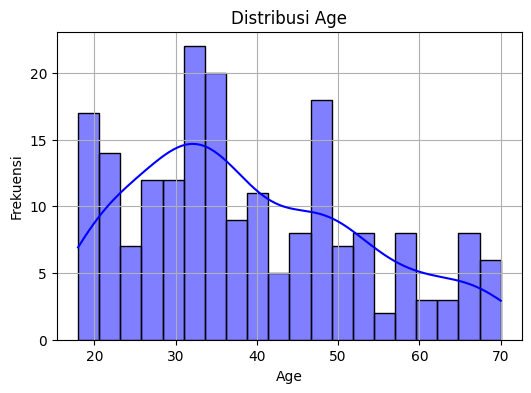

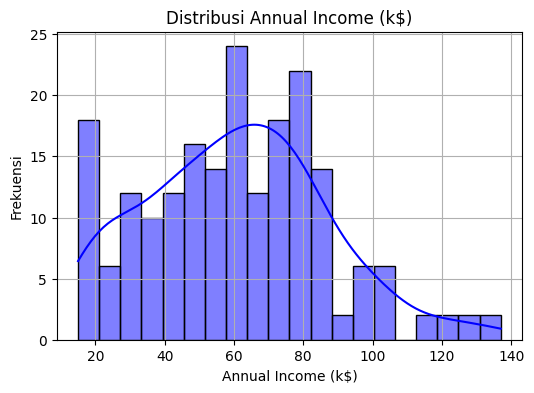

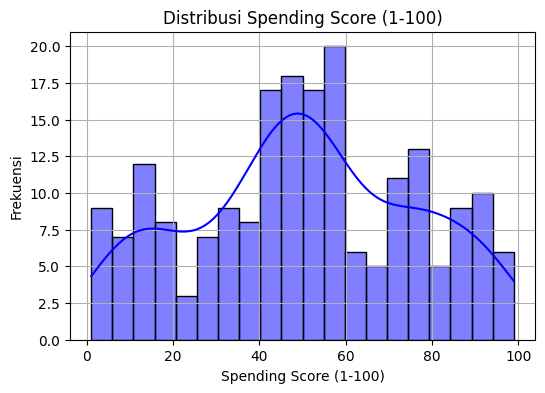


=== Pemeriksaan Outlier ===


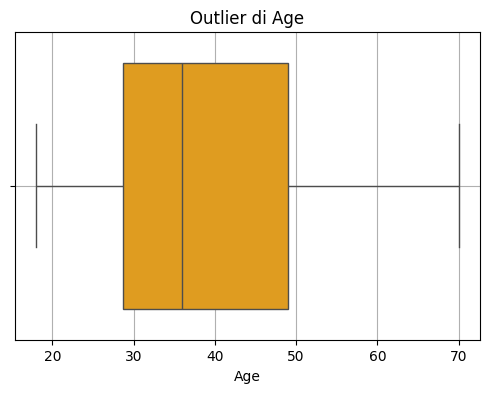

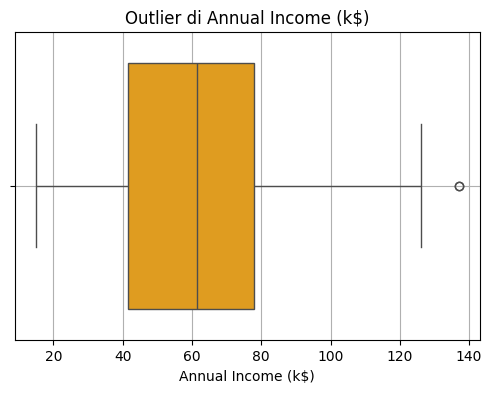

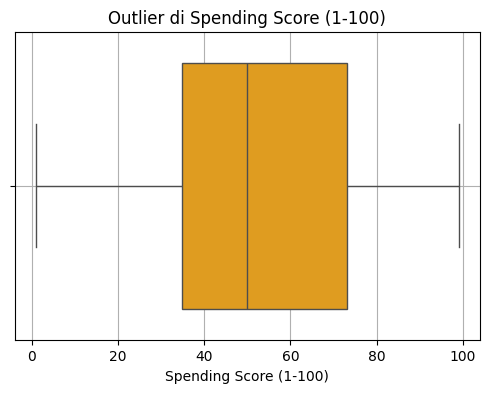


=== Hubungan Antar Fitur ===


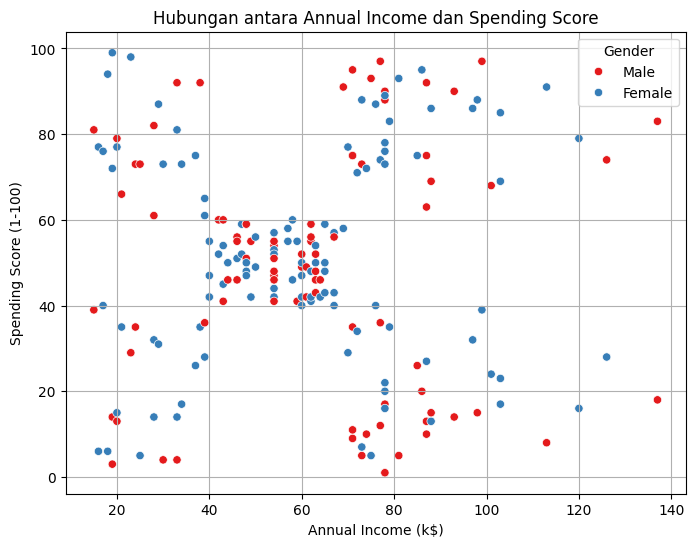

In [ ]:
# Fungsi untuk EDA
def perform_eda(df):
    # Distribusi kategori
    print("\n=== Distribusi Gender ===")
    if 'Gender' in df.columns:
        print(df['Gender'].value_counts())

    # Histogram untuk fitur numerik
    print("\n=== Visualisasi Distribusi ===")
    numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    for feature in numerical_features:
        if feature in df.columns:
            plt.figure(figsize=(6, 4))
            sns.histplot(df[feature], kde=True, bins=20, color='blue')
            plt.title(f'Distribusi {feature}')
            plt.xlabel(feature)
            plt.ylabel('Frekuensi')
            plt.grid()
            plt.show()

    # Boxplot untuk outlier
    print("\n=== Pemeriksaan Outlier ===")
    for feature in numerical_features:
        if feature in df.columns:
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=df[feature], color='orange')
            plt.title(f'Outlier di {feature}')
            plt.xlabel(feature)
            plt.grid()
            plt.show()

    # Scatter plot hubungan antar fitur
    print("\n=== Hubungan Antar Fitur ===")
    if 'Annual Income (k$)' in df.columns and 'Spending Score (1-100)' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='Set1')
        plt.title('Hubungan antara Annual Income dan Spending Score')
        plt.xlabel('Annual Income (k$)')
        plt.ylabel('Spending Score (1-100)')
        plt.legend(title='Gender')
        plt.grid()
        plt.show()

perform_eda(customer_data)

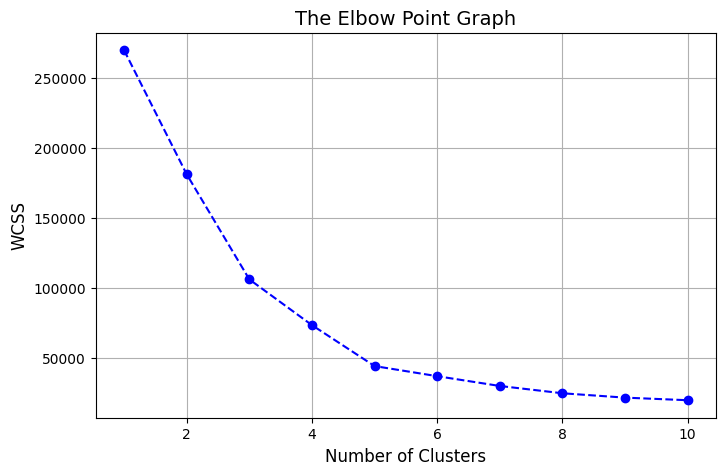

In [ ]:
# Ekstraksi fitur
X = customer_data.iloc[:, [3, 4]].values  # 'Annual Income' dan 'Spending Score'

# Menentukan jumlah klaster dengan metode Elbow
def plot_elbow_graph(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
    plt.title("The Elbow Point Graph", fontsize=14)
    plt.xlabel("Number of Clusters", fontsize=12)
    plt.ylabel("WCSS", fontsize=12)
    plt.grid()
    plt.show()

plot_elbow_graph(X)

In [ ]:
# K-Means Clustering
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

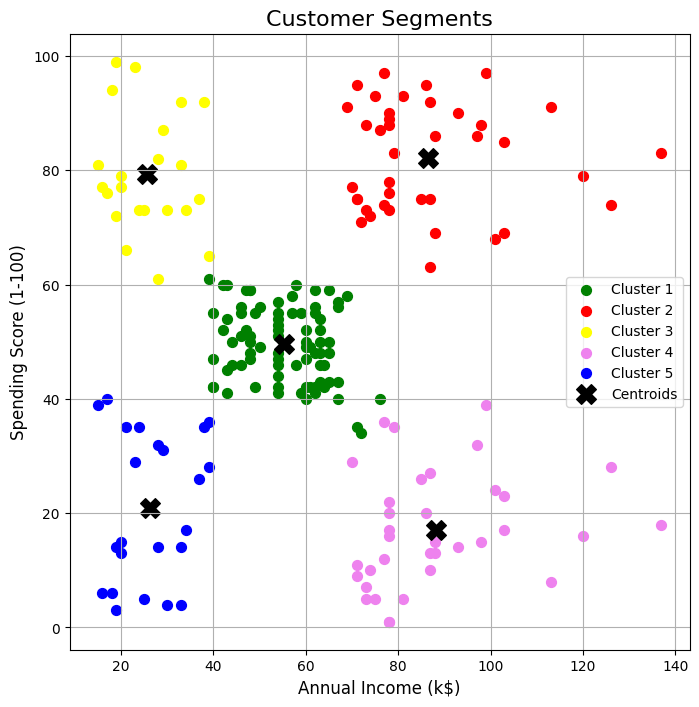

In [ ]:
# Visualisasi Klaster
def plot_clusters(X, y_kmeans, kmeans):
    plt.figure(figsize=(8, 8))
    colors = ['green', 'red', 'yellow', 'violet', 'blue']
    for i in range(optimal_clusters):
        plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
    # Plotting centroid
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=200, c='black', marker='X', label="Centroids")
    plt.title('Customer Segments', fontsize=16)
    plt.xlabel('Annual Income (k$)', fontsize=12)
    plt.ylabel('Spending Score (1-100)', fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

plot_clusters(X, y_kmeans, kmeans)